In [ ]:
'''The Dataset I choose is Movie Dataset.
The Major question about this Dataset:-
    Q1: Does higher budget mean higher popularity ?

    Q2: What length will receive the highest popularity?

    Q3: Higher popularity means higher profits ?
    
    Q4: What Features are Associate with Top 10 Revenue Movies ?
    
    Q5: Which genres are most popular from year to year?
'''

In [10]:
# Import all the libraries which will be used.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       
import numpy as np

In [11]:
# load in data and print out the head 
df=pd.read_csv("E:/Data Sets/movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
# check the rows and columns of this dataset
df.shape  

(10866, 21)

In [13]:
# check datatypes 
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [14]:
# check each columns number of unique values 
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [15]:
# statistic values for this data 
df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [17]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [18]:
'''
Data Wrangling:
 I did delete the duplicates and unuseful columns like imdb_id,homepage etc.
 When handling the missing data. I use two ways: for all the missing data with data type object, i fill the null with string "missing". For budget, datatype integer,I fill 0 with np.NAN.
'''
    

'\nData Wrangling:\n I did delete the duplicates and unuseful columns like imdb_id,homepage etc.\n When handling the missing data. I use two ways: for all the missing data with data type object, i fill the null with string "missing". For budget, datatype integer,I fill 0 with np.NAN.\n'

In [19]:
 
df.drop(['id','imdb_id', 'homepage','overview'],axis=1,inplace=True)  # do not forget inplace 

df['cast'].fillna('missing',inplace=True )
df['director'].fillna('missing',inplace=True)
df['tagline'].fillna('missing',inplace=True)
df['keywords'].fillna('missing',inplace=True)
df['genres'].fillna('missing',inplace=True)
df['production_companies'].fillna('missing',inplace=True) 
df['budget'] = df['budget'].replace(0, np.NAN) 
# although there is no null in budget, but we would find there is a problem when we calculate df['budget'].median()
# Will deal with all the 0 value in budget later.

In [20]:
# confirm the data 
df.isnull().sum()

popularity                 0
budget                  5696
revenue                    0
original_title             0
cast                       0
director                   0
tagline                    0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [23]:
# check if there are some duplicates 
df.duplicated().sum()

1

In [24]:
# drop the duplicates
df.drop_duplicates(inplace=True)      

df.duplicated().sum()   

0

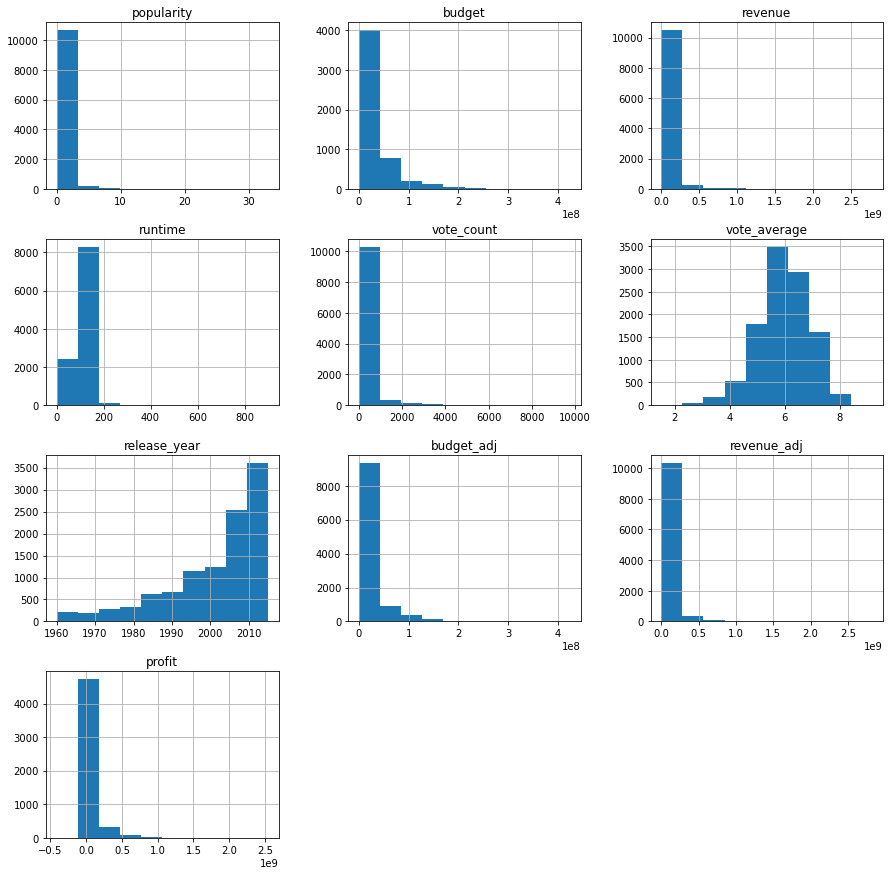

In [79]:
# visulize each variables 
df.hist(figsize=(15,15));

Text(0, 0.5, 'Popularity')

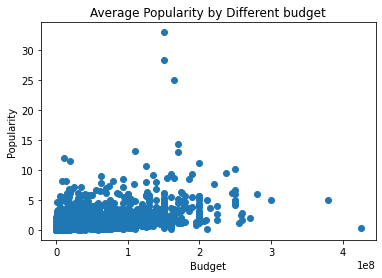

In [26]:
#Exploration with visuals and conclusion


#Q1:Does higher budget mean higher popularity ?



# ploting the relation between budget and popularity.
x = df['budget']
y = df['popularity'] 

plt.scatter(x,y)
plt.title('Average Popularity by Different budget',fontsize=12)
plt.xlabel('Budget',fontsize=10)
plt.ylabel('Popularity',fontsize=10)

In [ ]:
#We can not see very strong relatioship between the budget and the popularity from above plot. Let's try to compare the data in another way: create two groups based on median value of budget

In [27]:
# based on median budget value to divide the budget into two groups : low and high
m = df['budget'].median()
low_budg =  df.query('budget < {}'.format(m))
high_budg =  df.query('budget >= {}'.format(m))

In [28]:
# check low budget and high budget mean values respecively 
mean_popularity_of_low_budget = low_budg['popularity'].mean()
mean_popularity_of_high_budget = high_budg['popularity'].mean()

Text(0, 0.5, 'Average Popularity')

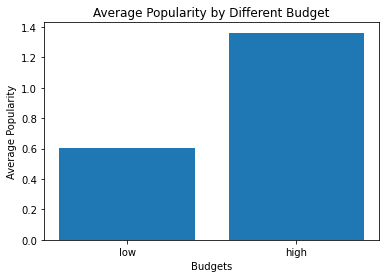

In [36]:
# create a bar chart with the values we get above 
x=["low","high"]
h=[mean_popularity_of_low_budget , mean_popularity_of_high_budget]
plt.bar(x,h)
plt.title('Average Popularity by Different Budget')
plt.xlabel('Budgets')
plt.ylabel('Average Popularity')

In [ ]:
#Conlcusion for Q1: Through this bar plot, we can clearly see that high budget movies are more likely to have higher popularity.

In [ ]:
#Q2: What length will receive the highest popularity?

In [38]:
# here I will create 3 groups with query().  <100 min: short   , <200: medium ,  >200 min: long 
short =  df.query('runtime < {}'.format(100))
medium =  df.query('runtime < {}'.format(200))
long = df.query('runtime > {}'.format(200))

In [39]:
# check mean popularity of different movie lengths 
mean_popularity_of_short = short['popularity'].mean()
mean_popularity_of_medium = medium['popularity'].mean()
mean_popularity_of_long = long['popularity'].mean()

Text(0, 0.5, 'Average Popularity')

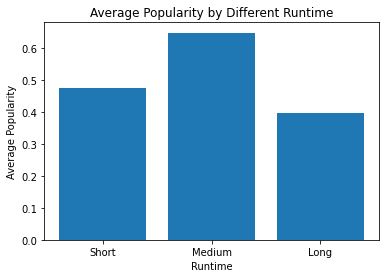

In [41]:
# create a bar chart with the values we get above 
x=["Short","Medium","Long"]
h=[mean_popularity_of_short,mean_popularity_of_medium,mean_popularity_of_long]
plt.bar(x,h)
plt.title('Average Popularity by Different Runtime')
plt.xlabel('Runtime')
plt.ylabel('Average Popularity')

In [ ]:
#The movies should not be too long or too short. Medium length is better to gain higher popularity. But above bar chart is hard to tell the best length of runtime. Scatter plot may be a better choice.

Text(0, 0.5, 'popularity')

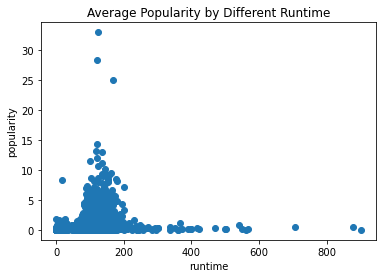

In [42]:
# ploting the relation between runtime and popularity.
x = df['runtime']
y = df['popularity'] 

plt.scatter(x,y)

plt.title('Average Popularity by Different Runtime',fontsize=12)
plt.xlabel('runtime',fontsize=10)
plt.ylabel('popularity',fontsize=10)

In [ ]:
'''Conclusion Q2:
Combine two plots above, we can not simply say , the longer runtime, the more popular the movies are.
If the movies are within 200 minutes,it will be more popular. Once the movies run over 200 minutes, it's hard for them to gain high popularity
'''

In [ ]:
#Q3 : Higher popularity means higher profits ?

In [54]:
# we need to get the median of popularity.
m_popularity = df['popularity'].median()
lower_popularity =  df.query('popularity < {}'.format(m_popularity))
higher_popularity =  df.query('popularity >= {}'.format(m_popularity))

In [55]:
# creating a new column called profit. 
df['profit'] = df['revenue'] - df['budget']


In [56]:
# average net profit for low_popularity and high_popularity
mean_profit_of_low_popularity = lower_popularity['profit'].mean()
mean_profit_of_high_popularity = higher_popularity['profit'].mean()



Text(0, 0.5, 'Average Profit')

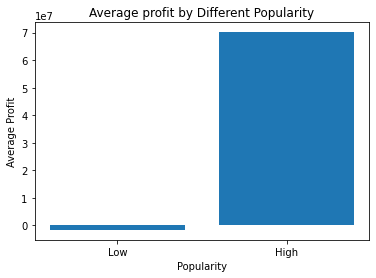

In [58]:
x=["Low","High"]
h=[mean_profit_of_low_popularity,mean_profit_of_high_popularity]
plt.bar(x,h)
plt.title('Average profit by Different Popularity')
plt.xlabel('Popularity')
plt.ylabel('Average Profit')

In [ ]:
#Conclusion for Q3: As we can see above, higher popularity does make much higher average profits.

In [ ]:
#Q4:What Features are Associate with Top 10 Revenue Movies ?

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>],
       [<AxesSubplot:title={'center':'profit'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

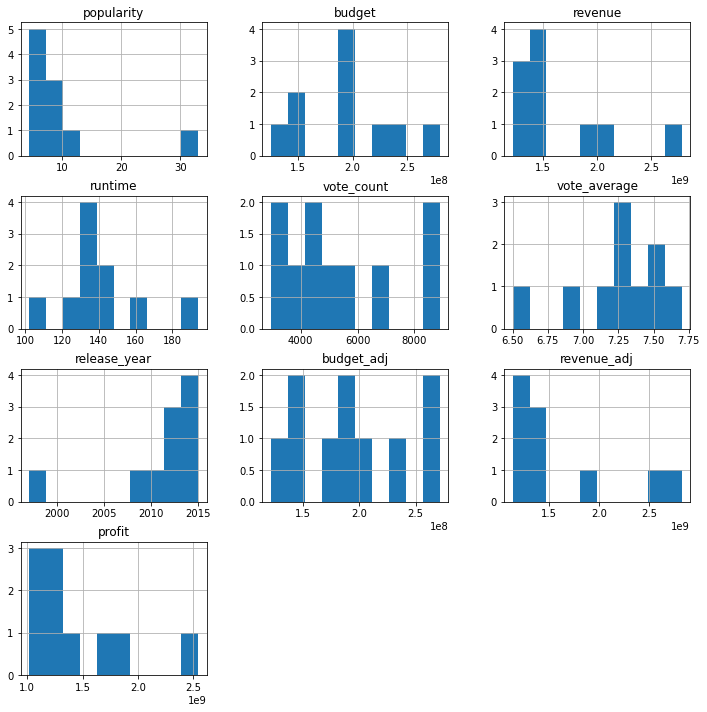

In [78]:
top10_revenue = df.nlargest(10,'revenue')
top10_revenue.hist(figsize=(12,12))

In [ ]:
#Conclusion for question 4:There are some characteristics we can conclude from the top 10 movies. Runtime ranges from 100 mins to 200 mins. The released year are between 1995 to 2015.

In [ ]:
#Q5:Which genres are most popular?

In [76]:
#The following function can give all the counts for per category 
def extract_data(column_name):
    data = df[column_name].str.cat(sep = '|') # put all the genres into a long string  
    # Create pandas series and store the values separately
    data = pd.Series(data.split('|'))   # split the genres by |
    # Display value count in descending order
    count = data.value_counts(ascending = False) # count the occurrence of each genres 
    return count

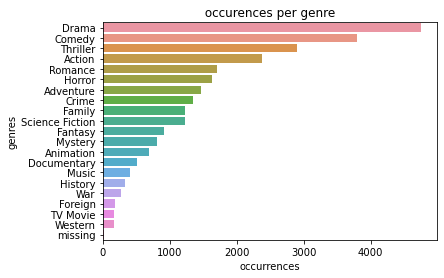

In [77]:
# using the function created above to split genres and count the occurrence of each one.
genre_count = extract_data('genres')

#create a separate dataframe to plot using dictionery
df_genre_counts = pd.DataFrame({'genres': genre_count.index, 'count': genre_count.values }) 
#df_genre_counts

ax = plt.subplot()
# use the dataframe just created as the input data 
sns.barplot(x = 'count', y = 'genres', data=df_genre_counts) # how to get the data is the key 
ax.set_title(' occurences per genre ')
ax.set_xlabel('occurrences')
ax.set_ylabel('genres')
plt.show()

In [ ]:
#Conclusion for Q5: As we can see above, top 5 generes are Drama,Comedy,Thriller,Action and Romance.

In [ ]:
'''
Conclusion:

Based on the analysis I did above, we can make the following summarizations:

1: We can not say high budget guarantees high popularity. But for movies with higher budgets do produce higher average popularity.
2: To produce a more popular movie, the runtime should be best around 150 mins; Drama, Comedy, Action, these genres would be preferable.



'''